In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

In [ ]:
# Carga de datos
df1 = pd.read_csv("../00.data/preprocesado/meneame_procesado_1.csv", encoding="utf-8")
df2 = pd.read_csv("../00.data/preprocesado/meneame_procesado_2.csv", encoding="utf-8")
df3 = pd.read_csv("../00.data/preprocesado/meneame_procesado_3.csv", encoding="utf-8")

df = pd.concat([df1,df2,df3], ignore_index=True)

In [ ]:
def comparar_noticias(df, news_id1, news_id2):

    noticia1 = df[df['news_id'] == news_id1].iloc[0]
    noticia2 = df[df['news_id'] == news_id2].iloc[0]

    # Variables a comparar
    variables = ["clicks", "comments", "karma", "positive_votes", "anonymous_votes", "negative_votes"]
    
    valores_noticia1 = [noticia1[var] for var in variables]
    valores_noticia2 = [noticia2[var] for var in variables]
    
    max_values = df[variables].max()

    # Normalizamos las noticias con respecto alvalor máximo
    def normalizar(valor, max_val):
        return valor / max_val
    
    normalized_noticia1 = [normalizar(val, max_values.iloc[i]) for i, val in enumerate(valores_noticia1)]
    normalized_noticia2 = [normalizar(val, max_values.iloc[i]) for i, val in enumerate(valores_noticia2)]

    categorias = variables
    num_variables = len(categorias)

    angles = np.linspace(0, 2 * np.pi, num_variables, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.plot(angles, normalized_noticia1 + [normalized_noticia1[0]], linewidth=2, linestyle='solid', label=f'Noticia {news_id1}')
    ax.plot(angles, normalized_noticia2 + [normalized_noticia2[0]], linewidth=2, linestyle='solid', label=f'Noticia {news_id2}')

    ax.fill(angles, normalized_noticia1 + [normalized_noticia1[0]], alpha=0.25)
    ax.fill(angles, normalized_noticia2 + [normalized_noticia2[0]], alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categorias)

    plt.title(f'Comparación de Noticias {news_id1} vs {news_id2}', size=14)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

    plt.show()

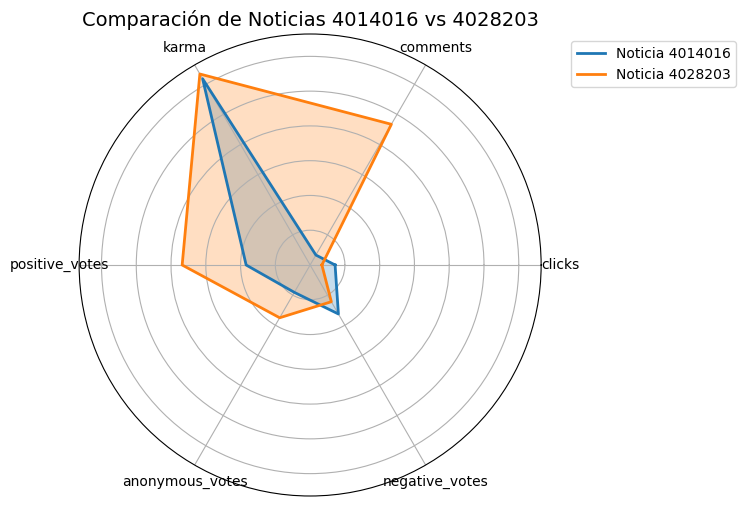

In [4]:
comparar_noticias(df, df["news_id"][2180], df["news_id"][250])

In [5]:
# noticia con más clicks
noticia_max_clicks = df.loc[df['clicks'].idxmax()]
noticia_max_clicks

news_id                                                      3096108
title              Somos Daniel Seijo y Remo, te respondemos sobr...
content            Este mes es decisivo para la reforma europea d...
full_story_link                                          Desconocido
meneos                                                           466
clicks                                                        294527
karma                                                            402
positive_votes                                                   283
anonymous_votes                                                  183
negative_votes                                                    25
category                                                  Miscelaneo
comments                                                         560
published_date                                   2019-03-12 18:50:03
user                                                          dseijo
source                            

In [6]:
# noticia con más comentarios
noticia_max_comments = df.loc[df['comments'].idxmax()]
noticia_max_comments

news_id                                                      3379998
title                           Comprobemos el límite de comentarios
content            Buenas a todas las personas de bien. Viendo la...
full_story_link    https://meneame.net/story/comprobemos-limite-c...
meneos                                                           132
clicks                                                         11115
karma                                                            182
positive_votes                                                    90
anonymous_votes                                                   42
negative_votes                                                     4
category                                   Entretenimiento y Cultura
comments                                                        2718
published_date                                   2020-09-16 12:46:54
user                                                      --310732--
source                            